# 1st. Data read in & Data Process & Frequency FILE Create #

## 1. Variables Declairation 声明变量

In [12]:
import math
import re


total = 0
data = []
lstFrequency = []
txtFrenquency = []
dicFrequency = {}

## 2. Data read-in & data Pre-process 文件读入与数据预处理

In [14]:
with open('/Users/jason/Documents/GitHub/Information_Search/20210309_WordFrequency/Test_Data/3rd_Bush-Kerry.txt', 'r+') as dataFile:
    for line in dataFile.readlines():
        if line != None:
            data.append(line.strip('\n'))
dataProcessed = ' '.join(data).split(' ')

## 3.Build Dictionary & Calculate Frequency 建立字典与计算频率

In [15]:
for word in dataProcessed :
    dicFrequency[word] = dicFrequency.get(word, 0) + 1
    total += 1

## 4. Sortig Data 对结果排序

In [16]:
lstFrequency = list(dicFrequency.items())
print(lstFrequency)
lstFrequency.sort(key = lambda p: (-p[1], p[0]))

[('debate', 22), ('transcript', 2), ('october', 2), ('the', 1520), ('third', 8), ('bush', 32), ('kerry', 62), ('presidential', 12), ('candidates', 8), ('arizona', 26), ('state', 20), ('university', 6), ('tempe', 6), ('speakers', 2), ('george', 10), ('w', 4), ('president', 264), ('of', 646), ('united', 42), ('states', 50), ('u', 4), ('s', 458), ('senator', 96), ('john', 18), ('f', 2), ('ma', 2), ('democratic', 2), ('nominee', 2), ('bob', 30), ('schieffer', 10), ('cbs', 6), ('anchor', 2), ('good', 24), ('evening', 2), ('from', 70), ('in', 524), ('i', 852), ('m', 82), ('news', 8), ('want', 66), ('to', 1326), ('welcome', 4), ('you', 478), ('and', 862), ('last', 40), ('debates', 8), ('between', 24), ('as', 178), ('jim', 2), ('lehrer', 2), ('told', 14), ('before', 20), ('first', 42), ('one', 70), ('these', 30), ('are', 194), ('sponsored', 2), ('by', 100), ('commission', 6), ('on', 178), ('tonight', 22), ('topic', 2), ('will', 112), ('be', 150), ('domestic', 2), ('affairs', 2), ('but', 160), 

## 5. Texting Data 数据文本化（方便后续写入文档）

In [17]:
for fr in lstFrequency:
    fr = list(fr)
    txtFrenquency.append(fr[0] + ':' + ' ' + str(fr[1]) + '\n')

Result = ''.join(txtFrenquency)

## 6. Create a WordFrequence File 创建字频文档

In [18]:
fileName = dataFile.name

dot = re.compile('\.')                                  # Renaming 
fileName = re.sub(dot, '_Frequency.',fileName)          # Renaming 

ResultFile = open(fileName, 'w')
ResultFile.write(Result)

22527

In [20]:
dataFile.close()
ResultFile.close()

# 2nd. Data Data Visualization with Matplotlib 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Variables Declairation 声明变量

In [26]:
topWords = []
totalOrigin = total

#使用类来存储数据
class topWord:
    def __init__(self, word, frequency):
        self.word = word
        self.frequency = frequency

the 31660


## 2.Search Top-5 Words 统计出现次数最多的五个单词

In [31]:
for i in range(0, 5):
    tmp = topWord(lstFrequency[i][0], lstFrequency[i][1])
    topWords.append(tmp)
    total -= lstFrequency[i][1]   #统计篇幅总词数

print(topWords[0].word, total)

the 15832


## 3. Ploting Figure 作图

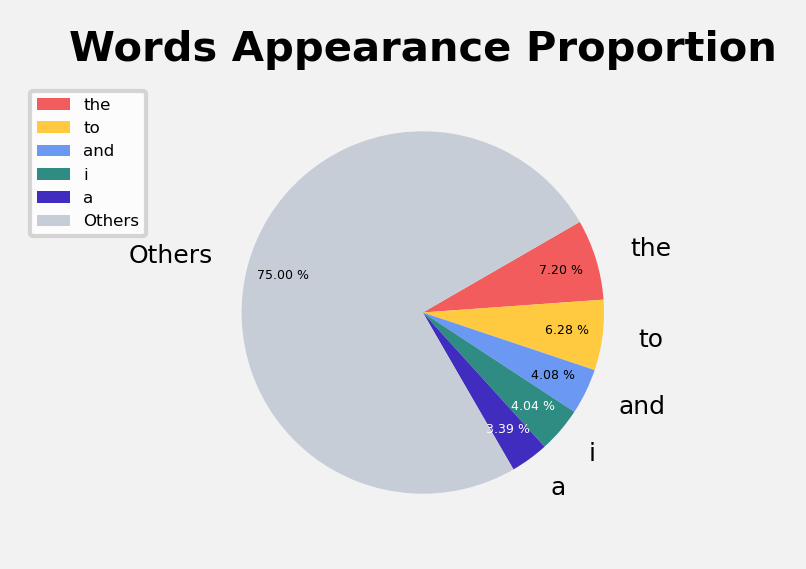

In [32]:
plt.figure(figsize=(3, 2), dpi=300, facecolor='#f2f2f2')

plt.title('Words Appearance Proportion', fontdict={'fontweight': '600', 'fontsize': '10'})

Labels = [topWords[0].word, topWords[1].word, topWords[2].word, topWords[3].word, topWords[4].word, 'Others']
Values = [topWords[0].frequency, topWords[1].frequency, topWords[2].frequency, topWords[3].frequency, topWords[4].frequency, total]
Colors = ['#F25C5C', '#FFCA40', '#6B98F2', '#2E8C83', '#402CBF', '#c6cdd7']

patches, texts, autotexts = plt.pie(Values, labels = Labels, colors=Colors, autopct = '%.2f %%', pctdistance = 0.8, labeldistance = 1.2, startangle = 30, textprops={'size': '6'}, counterclock=False)
plt.setp(autotexts, size='3')

autotexts[3].set_color('white'),autotexts[4].set_color('white')

plt.legend(loc="upper right",fontsize=4,bbox_to_anchor=(-0.1,1),borderaxespad=0.3)

## 4.File Renaming & Figure Saving 文件重命名与图像储存

In [ ]:
fileOriginName = dataFile.name

form = re.compile('(\.).*')                                 
PltName = re.sub(form, '_Proprotion.jpeg',fileOriginName)         
plt.savefig(PltName , dpi=300) 

plt.show() # plt.show() 一定要写在最后，否则会出现保存图拍为空白的现象